In [ ]:
#run this if you have not install sentence_transformer
#!pip install sentence_transformers

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#change your csv accordingly***
documents=pd.read_csv('JobPhysio_Cleaned(SW).csv')

documents['documents'] = documents['job_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
documents_df=pd.DataFrame(documents,columns=['documents'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sally\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
documents_df

,documents
0,specialisation geriatrics setting senior dayca...
1,institute appropriate effective client therapy...
2,participate multidisciplinary case discussions...
3,contribute formulation follow-up clients indiv...
4,plan conduct group therapy programme activitie...
...,...
102,provide physiotherapy assessment treatment pat...
103,develop implement care plan assist patients ma...
104,also educate patients caregivers condition car...
105,addition provide guidance junior staff.


In [3]:
stop_words_l=stopwords.words('english')
documents_df['documents_cleaned']=documents_df.documents.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split()))

In [4]:
documents_df=pd.DataFrame(documents_df,columns=['documents_cleaned'])

In [5]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 0)

In [6]:
documents_df=documents_df.drop_duplicates(keep='first')

In [7]:
documents_df

,documents_cleaned
0,specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews
1,institute appropriate effective client therapy treatment
2,participate multidisciplinary case discussions care team
3,contribute formulation follow up clients individual care plan icp ensure holistic health care coverage
4,plan conduct group therapy programme activities day care clients
...,...
102,provide physiotherapy assessment treatment patients musculoskeletal conditions
103,develop implement care plan assist patients manage pain disability regain maximize functional abilities
104,also educate patients caregivers condition care implement coping strategy patients
105,addition provide guidance junior staff


### Corpus Dataframe

In [8]:
documents_df['documents_cleaned']

0      specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews                                 
1      institute appropriate effective client therapy treatment                                                                                                                                                                                                                       
2      participate multidisciplinary case discussions care team                                                                                                                                                                                                                       
3      contribute formulation follow up clients individual care plan  icp  ensure holistic health care coverage                                                    

In [9]:
tokensized_jd = documents_df.loc[0, "documents_cleaned"]
print(tokensized_jd)

specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


#### BERT model

In [10]:
documents_df['documents_cleaned'][1]

'institute appropriate effective client therapy treatment '

In [11]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [12]:
document_embeddings =(documents_df['documents_cleaned'].values.tolist())

In [13]:
document_embeddings

['specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews ',
 'institute appropriate effective client therapy treatment ',
 'participate multidisciplinary case discussions care team ',
 'contribute formulation follow up clients individual care plan  icp  ensure holistic health care coverage ',
 'plan conduct group therapy programme activities day care clients ',
 'review revise programme schedule necessary enhance quality therapy program ',
 'take charge proper documentation therapy records ',
 'interact foster close warm relationships clients families caregivers exhibit sincerity care respect clients ',
 'requirements bachelor degree   diploma occupational therapy qualified registered ahpc  allied health professions council  ',
 'minimum   years working experience hospital eldercare institution good commu

In [14]:

#Compute embeddings
embeddings = model.encode(document_embeddings,convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
            pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

print(len(pairs))


for pair in pairs[0:200]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(document_embeddings[i], document_embeddings[j], pair['score']))

    #df = pd.DataFrame(columns=['A'])
    #df = df.append({'A': document_embeddings[i]}, ignore_index=True)

    #tempdf = pd.DataFrame(pair['index'], columns=["Score"])
    #df = pd.concat([df, tempdf], axis=0)
    #df=pd.DataFrame(list(zip(document_embeddings[i],document_embeddings[j],pair['score'])),columns=["i","j","Score"])

2485
key accountabilities   assist hod   chief physiotherapist managing physiotherapy services  		 key accountabilities assist hod   chief physiotherapist managing physiotherapy services  		 Score: 1.0000
ensure referring sources updated appropriately patient s progress timely manner  		   ensure referring sources updated appropriately patient s progress timely manner  		 Score: 1.0000
qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum   years relevant experience additional information 		 qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum   years relevant experience 		 Score: 0.9756
responsibilities diagnose assess treat patients physical problem condition develop suggest treatment programme encourage exercise movement use range technique equipment educate patients prevent improve conditions work patients range conditions ad hoc duties assigned requirements degree physiotherapy fully registered ahpc prior   years

In [15]:
#Compute embeddings
embeddings = model.encode(document_embeddings,convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
results_list = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
            pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})
            
#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

print(len(pairs))
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame(columns=["Text1","Text2","Score"])

for pair in pairs[0:200]:
    i, j = pair['index']
    df = df.append({"Text1":document_embeddings[i],"Text2":document_embeddings[j],"Score":pair['score']},ignore_index=True)
"""
    print("{} \t\t {} \t\t Score: {:.4f}".format(document_embeddings[i], document_embeddings[j], pair['score']))
    # Initiate an empty list to store results.
    
df = pd.DataFrame(columns=["Text","Predicted as"])
for text, predicted in zip(texts, predictions):
    df = df.append({"Text":text,"Predicted as":id_to_category[predicted]})





    results_list = []

    # Two loops to compare each vector with another vector only once.
    for i in range(len(vector_list)):
        # Get first vector
        vector1 = vector_list[i]

        for j in range(i+1, len(vector_list)):
            # Get the next vector
            vector2 = vector_list[j]

            # Calculate cosine similarity
            similarity_score = cosine_similarity(vector1, vector2, ndigits)

            # Append to results list if similarity score is between 1 and the threshold.
            # Note that scores of 1 can be ignored here if we want to exclude people with the same name.
            if 1 >= similarity_score >= similarity_threshold:
                results_list.append(document_embeddings[i], document_embeddings[j],pair['score'])

            else:
                pass

    # Convert list to dataframe.
    results_df = pd.DataFrame(results_list)
    if len(results_df) != 0:
        results_df.columns = ['full_name', 'comparison_name', 'similarity_score']
    else:
    # Can add error here if there's no results to return if desired.
    pass
"""

2485


'\n    print("{} \t\t {} \t\t Score: {:.4f}".format(document_embeddings[i], document_embeddings[j], pair[\'score\']))\n    # Initiate an empty list to store results.\n    \ndf = pd.DataFrame(columns=["Text","Predicted as"])\nfor text, predicted in zip(texts, predictions):\n    df = df.append({"Text":text,"Predicted as":id_to_category[predicted]})\n\n\n\n\n\n    results_list = []\n\n    # Two loops to compare each vector with another vector only once.\n    for i in range(len(vector_list)):\n        # Get first vector\n        vector1 = vector_list[i]\n\n        for j in range(i+1, len(vector_list)):\n            # Get the next vector\n            vector2 = vector_list[j]\n\n            # Calculate cosine similarity\n            similarity_score = cosine_similarity(vector1, vector2, ndigits)\n\n            # Append to results list if similarity score is between 1 and the threshold.\n            # Note that scores of 1 can be ignored here if we want to exclude people with the same name.\n

In [16]:
pd.set_option('display.max_colwidth', None)

In [17]:
df

,Text1,Text2,Score
0,key accountabilities assist hod chief physiotherapist managing physiotherapy services,key accountabilities assist hod chief physiotherapist managing physiotherapy services,tensor(1.0000)
1,ensure referring sources updated appropriately patient s progress timely manner,ensure referring sources updated appropriately patient s progress timely manner,tensor(1.0000)
2,qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum years relevant experience additional information,qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum years relevant experience,tensor(0.9756)
3,responsibilities diagnose assess treat patients physical problem condition develop suggest treatment programme encourage exercise movement use range technique equipment educate patients prevent improve conditions work patients range conditions ad hoc duties assigned requirements degree physiotherapy fully registered ahpc prior years relevant experiences interested candidates wish apply advertised position please email us updated copy resume attn blh contact office confidential discussion,responsibilities diagnose assess treat patients physical problem condition develop suggest treatment programme encourage exercise movement use range technique equipment educate patients prevent improve conditions conduct teaching basic core stability positions work patients range conditions ad hoc duties assigned requirements degree diploma physiotherapy must fully registered allied health professions council interested candidates wish apply advertised position please email us updated copy resume contact office confidential discussion,tensor(0.9754)
4,contribute formulation follow up clients individual care plan icp ensure holistic health care coverage,contribute formulation follow up clients individual care plan ensure holistic health care coverage,tensor(0.9505)
...,...,...,...
195,duty assigned rehab manager general manager skills knowledge educational requirements diploma degree physiotherapy recognised singapore allied health professional council,qualified registered ahpc minimum years working experience hospital eldercare institution preference candidate working experience community setting,tensor(0.6334)
196,institute appropriate effective client therapy treatment,training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients,tensor(0.6331)
197,ensure proper documentation made treatment rendered patients,provide physiotherapy assessment treatment patients musculoskeletal conditions,tensor(0.6325)
198,ensure referring sources updated appropriately patient s progress timely manner,also educate patients caregivers condition care implement coping strategy patients,tensor(0.6325)


In [18]:
df.dtypes

Text1    object
Text2    object
Score    object
dtype: object

In [19]:
df['Score'] = df['Score'].astype(str)

In [20]:
df['Score'] = df['Score'].str.replace("tensor","").str.replace("(","").str.replace(")","")

df

C:\Users\Sally\AppData\Local\Temp/ipykernel_18256/3999586597.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Score'] = df['Score'].str.replace("tensor","").str.replace("(","").str.replace(")","")


,Text1,Text2,Score
0,key accountabilities assist hod chief physiotherapist managing physiotherapy services,key accountabilities assist hod chief physiotherapist managing physiotherapy services,1.0000
1,ensure referring sources updated appropriately patient s progress timely manner,ensure referring sources updated appropriately patient s progress timely manner,1.0000
2,qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum years relevant experience additional information,qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum years relevant experience,0.9756
3,responsibilities diagnose assess treat patients physical problem condition develop suggest treatment programme encourage exercise movement use range technique equipment educate patients prevent improve conditions work patients range conditions ad hoc duties assigned requirements degree physiotherapy fully registered ahpc prior years relevant experiences interested candidates wish apply advertised position please email us updated copy resume attn blh contact office confidential discussion,responsibilities diagnose assess treat patients physical problem condition develop suggest treatment programme encourage exercise movement use range technique equipment educate patients prevent improve conditions conduct teaching basic core stability positions work patients range conditions ad hoc duties assigned requirements degree diploma physiotherapy must fully registered allied health professions council interested candidates wish apply advertised position please email us updated copy resume contact office confidential discussion,0.9754
4,contribute formulation follow up clients individual care plan icp ensure holistic health care coverage,contribute formulation follow up clients individual care plan ensure holistic health care coverage,0.9505
...,...,...,...
195,duty assigned rehab manager general manager skills knowledge educational requirements diploma degree physiotherapy recognised singapore allied health professional council,qualified registered ahpc minimum years working experience hospital eldercare institution preference candidate working experience community setting,0.6334
196,institute appropriate effective client therapy treatment,training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients,0.6331
197,ensure proper documentation made treatment rendered patients,provide physiotherapy assessment treatment patients musculoskeletal conditions,0.6325
198,ensure referring sources updated appropriately patient s progress timely manner,also educate patients caregivers condition care implement coping strategy patients,0.6325


In [21]:
df['Score'] = df['Score'].astype(np.float64)

df.dtypes

Text1     object
Text2     object
Score    float64
dtype: object

In [22]:
# Group Text2 to Text1 with top 3 scores
df5 = df.groupby(['Text1']).apply(lambda x: x.sort_values(['Score'], ascending=False).head(3)
.drop('Text1', axis=1))

In [23]:
df5

Text2   Score
Text1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
  ensure referring sources updated appropriately patient s progress timely manner                                                                                                            54                                                                                                                                                                                                                                                                                                                                  maintain clear appropriate accurate documentation treatments timely manner   0.7067
                                                                                                                                                                                             108                                                                                                                                                                                                                                                                                                         contribute formulation follow up clients individual care plan ensure holistic health care coverage   0.6753
                                                                                                                                                                                             199                                                                                                                                                                                                                                                                                                                         also educate patients caregivers condition care implement coping strategy patients   0.6325
administer therapeutic interventions alleviate impairment functional limitations maximize optimal recovery                                                                                   11                                                                                                                                                                                                                                                                                                     develop implement care plan assist patients manage pain disability regain maximize functional abilities   0.7892
administration maintain database records patients provide evidence based treatment accurate appropriate documentation                                                                        15                                                                                                                                                                                                                                                                                                                                                ensure proper documentation made treatment rendered patients   0.7743
...                                                                                                                                                                                                                                                                                                                                                                                                                 

In [24]:
#Taking in only scores with 0.7 and above 
df6 = df5[df5["Score"] >= 0.7]

In [25]:
df6

Text2   Score
Text1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
  ensure referring sources updated appropriately patient s progress timely manner                                                                                                            54                                                                                                                                                                                                                                                                                                                                 maintain clear appropriate accurate documentation treatments timely manner   0.7067
administer therapeutic interventions alleviate impairment functional limitations maximize optimal recovery                                                                                   11                                                                                                                                                                                                                                                                                                    develop implement care plan assist patients manage pain disability regain maximize functional abilities   0.7892
administration maintain database records patients provide evidence based treatment accurate appropriate documentation                                                                        15                                                                                                                                                                                                                                                                                                                                               ensure proper documentation made treatment rendered patients   0.7743
                                                                                                                                                                                             34                                                                                                                                                                                                                                                                                                                                                             take care proper documentation therapy records   0.7386
also provide caregiver education facilitate patients recovery                                                                                                                                9                                                                                                                                                                                                                                                                                                                          also educate patients caregivers condition care implement coping strategy patients   0.8034
...                                                                                                                                                                                                                                                                                                                                                                                                                       

In [26]:
df6a = df6.reset_index(level=['Text1'])

In [27]:
df6a

,Text1,Text2,Score
54,ensure referring sources updated appropriately patient s progress timely manner,maintain clear appropriate accurate documentation treatments timely manner,0.7067
11,administer therapeutic interventions alleviate impairment functional limitations maximize optimal recovery,develop implement care plan assist patients manage pain disability regain maximize functional abilities,0.7892
15,administration maintain database records patients provide evidence based treatment accurate appropriate documentation,ensure proper documentation made treatment rendered patients,0.7743
34,administration maintain database records patients provide evidence based treatment accurate appropriate documentation,take care proper documentation therapy records,0.7386
9,also provide caregiver education facilitate patients recovery,also educate patients caregivers condition care implement coping strategy patients,0.8034
...,...,...,...
5,take charge proper documentation therapy records,take care proper documentation therapy records,0.9217
41,take charge proper documentation therapy records,maintain accurate documentation therapy service required companys quality procedures guidelines participate conduct orientation in service education training programmes guide supervise daily routine activities staff charge required provide consultation rehabilitation team members patient handling matters regarding musculoskeletal injury perform activities related smooth running department,0.7235
20,training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients,also educate patients caregivers condition care implement coping strategy patients,0.7599
45,training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients,job description plan run physiotherapy rehab services senior care centre in coordination centre manager occupational therapist,0.7181


In [28]:
# This is to group all related text2 into a list which belongs to text1
df8 = df6.groupby('Text1').agg({'Text2':lambda x: list(x)})

In [29]:
df8a = df8.reset_index(level=['Text1'])

In [ ]:
df8a

**Clustering**

In [31]:
# We start by defining the structure of the graph
top_frame = df6a
edges = list(zip(top_frame['Text1'], top_frame['Text2']))
weighted_edges = list(zip(top_frame['Text1'], top_frame['Text2'], top_frame['Score']))
nodes = list(set(top_frame['Text1']).union(set(top_frame['Text2'])))

In [32]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G.add_weighted_edges_from(weighted_edges)

In [33]:
# !pip install python-louvain
import community
partition = community.best_partition(G)
modularity = community.modularity(partition, G)

In [ ]:
# Takes some time for larger graphs
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, dim=2)
community_id = [partition[node] for node in G.nodes()]
fig = plt.figure(figsize=(10,10))
nx.draw(G, pos, edge_color = ['silver']*len(G.edges()), cmap=plt.cm.tab20,
        node_color=community_id, node_size=150)

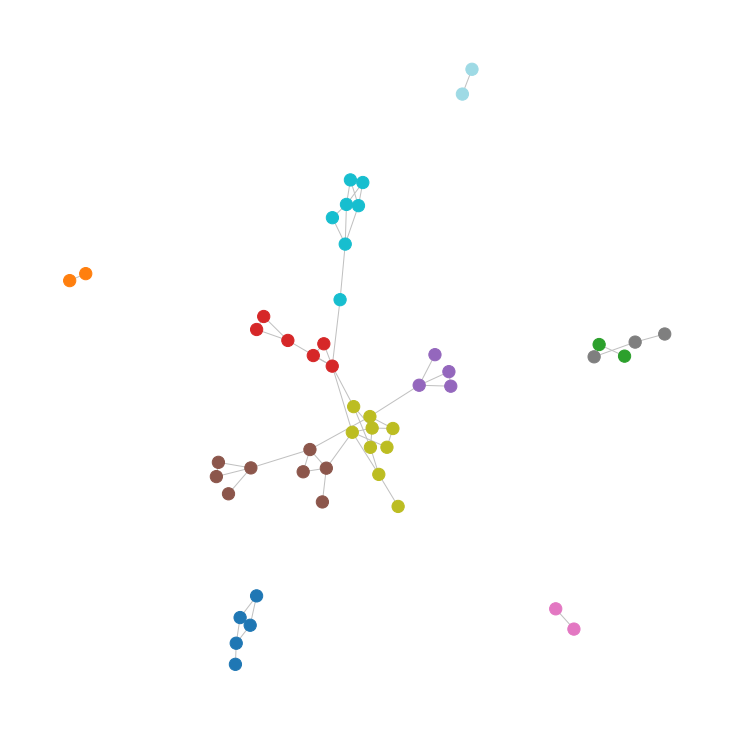

In [34]:
# Takes some time for larger graphs
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, dim=2)
community_id = [partition[node] for node in G.nodes()]
fig = plt.figure(figsize=(10,10))
nx.draw(G, pos, edge_color = ['silver']*len(G.edges()), cmap=plt.cm.tab20,
        node_color=community_id, node_size=150)

In [35]:
title, cluster = [], []
for i in partition.items():
    title.append(i[0])
    cluster.append(i[1])
    
frame_clust = pd.DataFrame([pd.Series(title), pd.Series(cluster)]).transpose()
frame_clust.columns = ['Text1', 'Cluster']

In [36]:
frame_clust

,Text1,Cluster
0,qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum years relevant experience,0
1,job code esl email address healthcare capitasingapore com ea license no,1
2,specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews,8
3,institute appropriate effective client therapy treatment,5
4,job code blh email addresshealthcare capitasingapore com ea license c,1
5,job purpose physiotherapist develops provides rehabilitative care services based care model patients nursing homes,8
6,provide training caregivers preparation patients discharge back home environment,8
7,interested candidates invited apply online comprehensive resume via apply button below,6
8,administration maintain database records patients provide evidence based treatment accurate appropriate documentation,9
9,critical accountabilities opportunities work healthcare professionals design appropriate rehabilitation programmes patients nursing home,8


In [37]:
frame_clust.sort_values(by=['Cluster'])
frame_clust.dtypes

Text1      object
Cluster    object
dtype: object

In [38]:
frame_clust['Cluster'] = frame_clust['Cluster'].astype(np.int)

frame_clust.dtypes

C:\Users\Sally\AppData\Local\Temp/ipykernel_18256/3507576849.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frame_clust['Cluster'] = frame_clust['Cluster'].astype(np.int)


Text1      object
Cluster     int32
dtype: object

In [ ]:
# !pip install natsort

In [39]:
from natsort import index_natsorted

In [40]:
# Use natural sorting to sort the clusters accordingly.
dfn = frame_clust

dfn.sort_values(
   by="Cluster",
   key=lambda x: np.argsort(index_natsorted(dfn["Cluster"])))

,Text1,Cluster
0,qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum years relevant experience,0
10,requirements bachelor degree diploma occupational therapy qualified registered ahpc allied health professions council,0
17,job requirements qualifications bachelor degree diploma physiotherapy,0
30,qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum years relevant experience additional information,0
47,qualified registered ahpc minimum years working experience hospital eldercare institution preference candidate working experience community setting,0
1,job code esl email address healthcare capitasingapore com ea license no,1
4,job code blh email addresshealthcare capitasingapore com ea license c,1
18,apologise respond shortlisted candidates,2
39,regret inform shortlisted candidate notified,2
16,responsibilities diagnose assess treat patients physical problem condition develop suggest treatment programme encourage exercise movement use range technique equipment educate patients prevent improve conditions conduct teaching basic core stability positions work patients range conditions ad hoc duties assigned requirements degree diploma physiotherapy must fully registered allied health professions council interested candidates wish apply advertised position please email us updated copy resume contact office confidential discussion,3


In [93]:
dfna = dfn.drop_duplicates(subset=['Cluster'])
dfnb = dfna.sort_values("Cluster")
dfnb

,Text1,Cluster
0,qualifications experience diploma bachelor degree physiotherapy accredited ahpc minimum years relevant experience,0
1,job code esl email address healthcare capitasingapore com ea license no,1
18,apologise respond shortlisted candidates,2
16,responsibilities diagnose assess treat patients physical problem condition develop suggest treatment programme encourage exercise movement use range technique equipment educate patients prevent improve conditions conduct teaching basic core stability positions work patients range conditions ad hoc duties assigned requirements degree diploma physiotherapy must fully registered allied health professions council interested candidates wish apply advertised position please email us updated copy resume contact office confidential discussion,3
22,evaluate prescribe assistive devices improve function activities daily living required patients,4
3,institute appropriate effective client therapy treatment,5
7,interested candidates invited apply online comprehensive resume via apply button below,6
24,assess plan implement monitor evaluate physiotherapy related service delivery residents,7
2,specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews,8
8,administration maintain database records patients provide evidence based treatment accurate appropriate documentation,9


In [90]:
#Count the number of text in the Cluster
dfn3 = dfn.Cluster.value_counts().rename_axis('Cluster').reset_index(name='Counts')#.style.hide_index()

dfn3 = dfn3.sort_values("Cluster").style.hide_index()
dfn3


Cluster,Counts
0,5
1,2
2,2
3,6
4,4
5,8
6,2
7,3
8,9
9,7


In [94]:
df_cd = pd.merge(dfn3, dfnb, how='inner', on = 'Cluster')

df_cd

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.io.formats.style.Styler'> was passed

In [ ]:
#add more clusters..
#join top text 1 and cluster into cluster/count
#

#groupby and assign.
#evaluate using different models and output
#similar sentence with sample existing 

In [44]:
text = input("Enter a job description: ")


# if input is close/similar to a text1 in (dfn), display (dfn3) row which consists of that particular text similarity.
# output of it should be as follow
# | Job Title | Cluster | Counts | Cleaned Sentence |

print(text)


test


In [43]:
# Create a dataframe from the Original Sentence into the Cluster
data =[['Text1',0],['Text2',1],['Text3',2],['Text4',3]]

dfx = pd.DataFrame(data,columns=['Cleaned Sentence', 'Cluster'])
dfx

,Cleaned Sentence,Cluster
0,Text1,0
1,Text2,1
2,Text3,2
3,Text4,3
